In [ ]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import scipy.stats as sts

mx = 0
my = 0
sigx = 1
sigy = 0.5
dt = 5 * 10 ** (-3)
er2 = 5
Be = 0.2
m = 1 / (Be * dt)
N = int(m / er2)
x = [0]
y = [0]

In [ ]:
print(N)

200


In [ ]:
for i in range(1, N):
  x += [sts.norm.rvs(mx, sigx)]
  y += [sts.norm.rvs(my, sigy)]
x = np.array(x)
y = np.array(y)

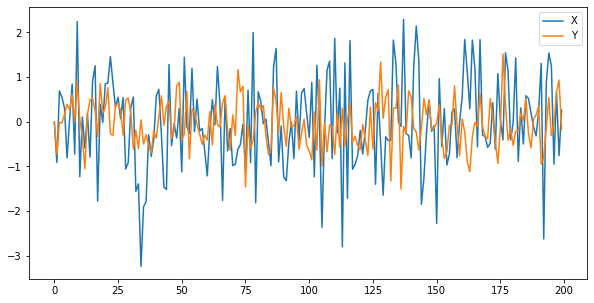

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x, label='X')
plt.plot(y, label='Y')
plt.legend()
plt.show()

In [ ]:
print('mx= ', np.mean(x))
print('my= ', np.mean(y))
print('dx= ', np.var(x, ddof=1))
print('dy= ', np.var(y, ddof=1))

mx=  -0.019908564048162446
my=  -0.04080836212948769
dx=  1.0466692820836359
dy=  0.2739026337801801


In [ ]:
Rxy = np.array([(1 / (N - i)) * sum(np.array(x[i:]) * np.array(y[: N - i])) for i in range(N)])
Ryx = np.array([(1 / (N - i)) * sum(np.array(y[i:]) * np.array(x[: N - i])) for i in range(N)])

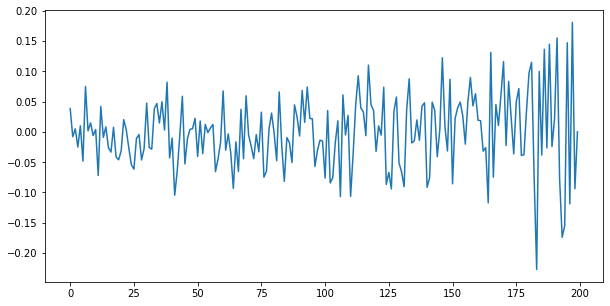

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(Rxy)
plt.show()

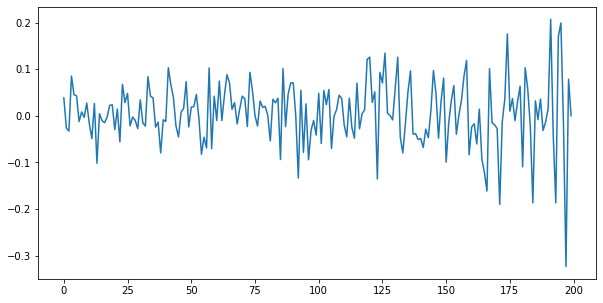

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(Ryx)
plt.show()

In [ ]:
Axy = (Rxy + Ryx) / 2 # четная составляющая
Bxy = (Rxy - Ryx) / 2 # нечетная составляющая

In [ ]:
from scipy.fft import fft

In [ ]:
C = np.real(fft(Axy)) # синфазная составляющая
Q = np.imag(fft(Bxy)) # квадратная составляющая

In [ ]:
Gxy = np.sqrt(C ** 2 + Q ** 2)
Teta = np.arctan(Q/C)

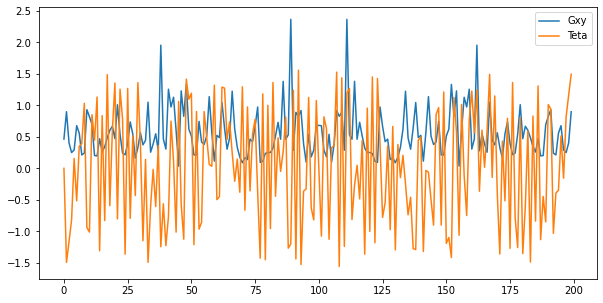

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(Gxy, label='Gxy')
plt.plot(Teta, label='Teta')
plt.legend()
plt.show()